In [24]:
# Imports
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# View data
df = pd.read_csv('data.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [3]:
# Show summary statistics
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,266.377134
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [4]:
# Check for missing values
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [5]:
# Drop null rows
df.dropna(subset=["Calories"], inplace=True)

# Check again
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [9]:
# Check again
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.00000,164.000000
mean,64.146341,107.676829,134.27439,375.800000
std,42.888820,14.637516,16.58306,266.377134
min,15.000000,80.000000,100.00000,50.300000
25%,45.000000,100.000000,124.00000,250.925000
50%,60.000000,105.500000,131.00000,318.600000
75%,60.000000,111.000000,143.00000,387.600000
max,300.000000,159.000000,184.00000,1860.400000


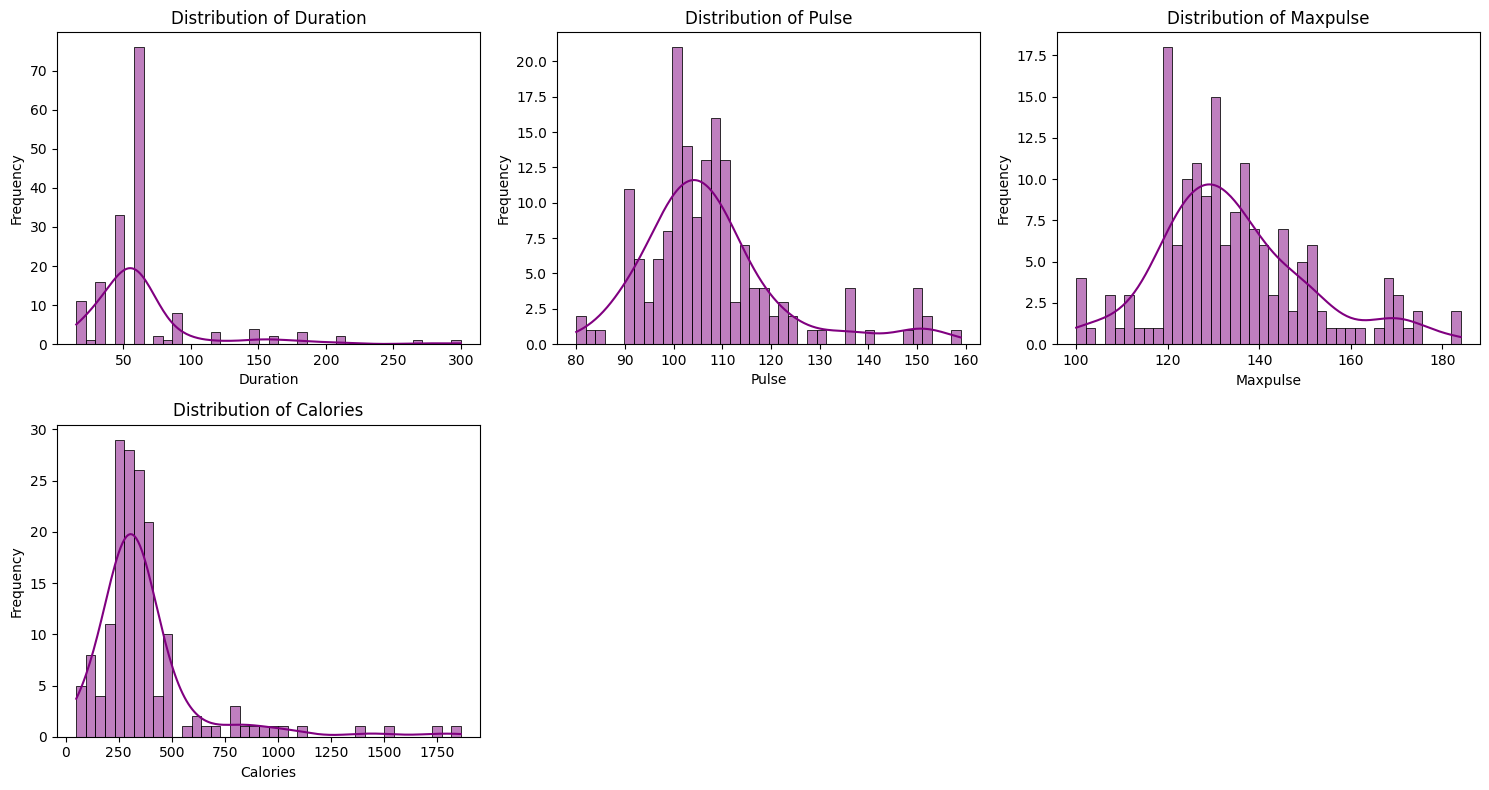

In [28]:
# Show histgrams
features_to_plot = ["Duration", "Pulse", "Maxpulse", "Calories"]
plt.figure(figsize=(15, 8))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color="purple", bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

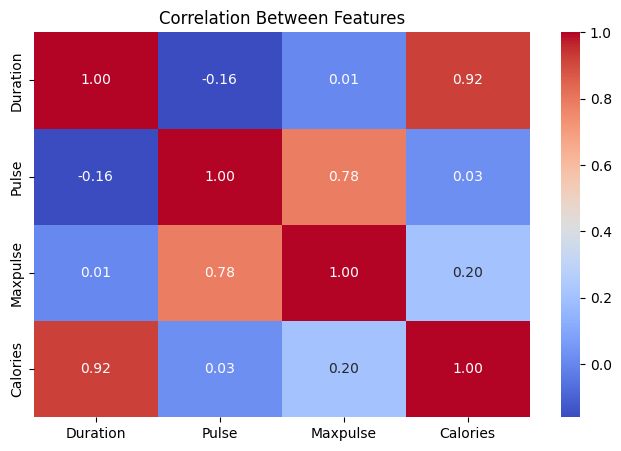

In [30]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
corr_matrix = df[["Duration", "Pulse", "Maxpulse", "Calories"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

cluster
2    133
1     17
0     14
Name: count, dtype: int64


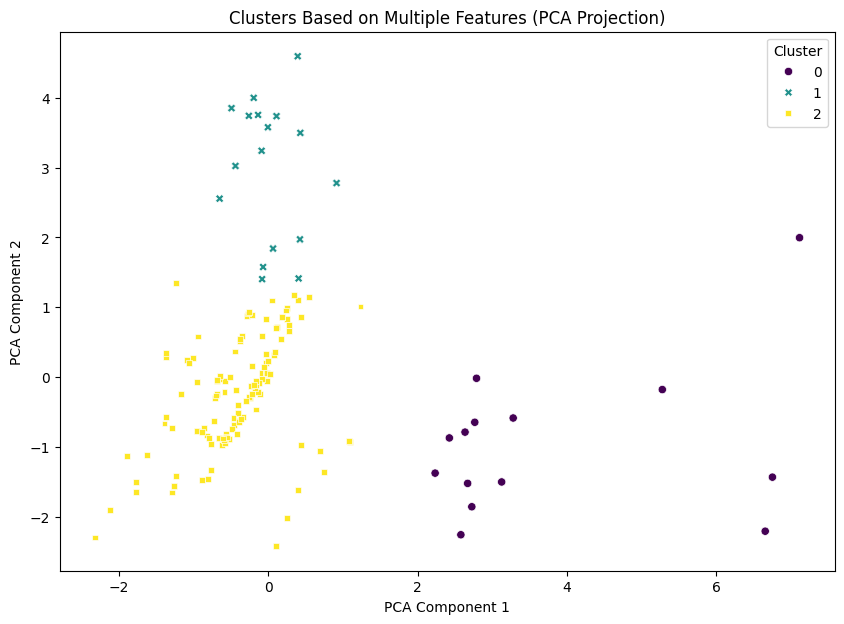

In [35]:
# PCA analysis
features_for_clustering = ["Duration", "Pulse", "Maxpulse", "Calories"]

# Standarize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[features_for_clustering])

kmeans = KMeans(n_clusters=3, random_state=50)
df["cluster"] = kmeans.fit_predict(x_scaled)

# Cluster sizes
print(df["cluster"].value_counts())

# Reduce dimensions to 2D
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df["cluster"], palette="viridis", style=df["cluster"])
plt.title("Clusters Based on Multiple Features (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [36]:
# Calculate mean values of features per cluster
df.groupby("cluster")[features_for_clustering].mean()

,Duration,Pulse,Maxpulse,Calories
cluster,,,,
0,183.571429,104.214286,138.928571,1093.678571
1,36.470588,138.941176,166.176471,281.882353
2,55.112782,104.045113,129.706767,312.238346


<ipython-input-39-527c6b4ab7a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cluster", y=feature, palette="Set2")
<ipython-input-39-527c6b4ab7a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cluster", y=feature, palette="Set2")
<ipython-input-39-527c6b4ab7a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cluster", y=feature, palette="Set2")
<ipython-input-39-527c6b4ab7a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

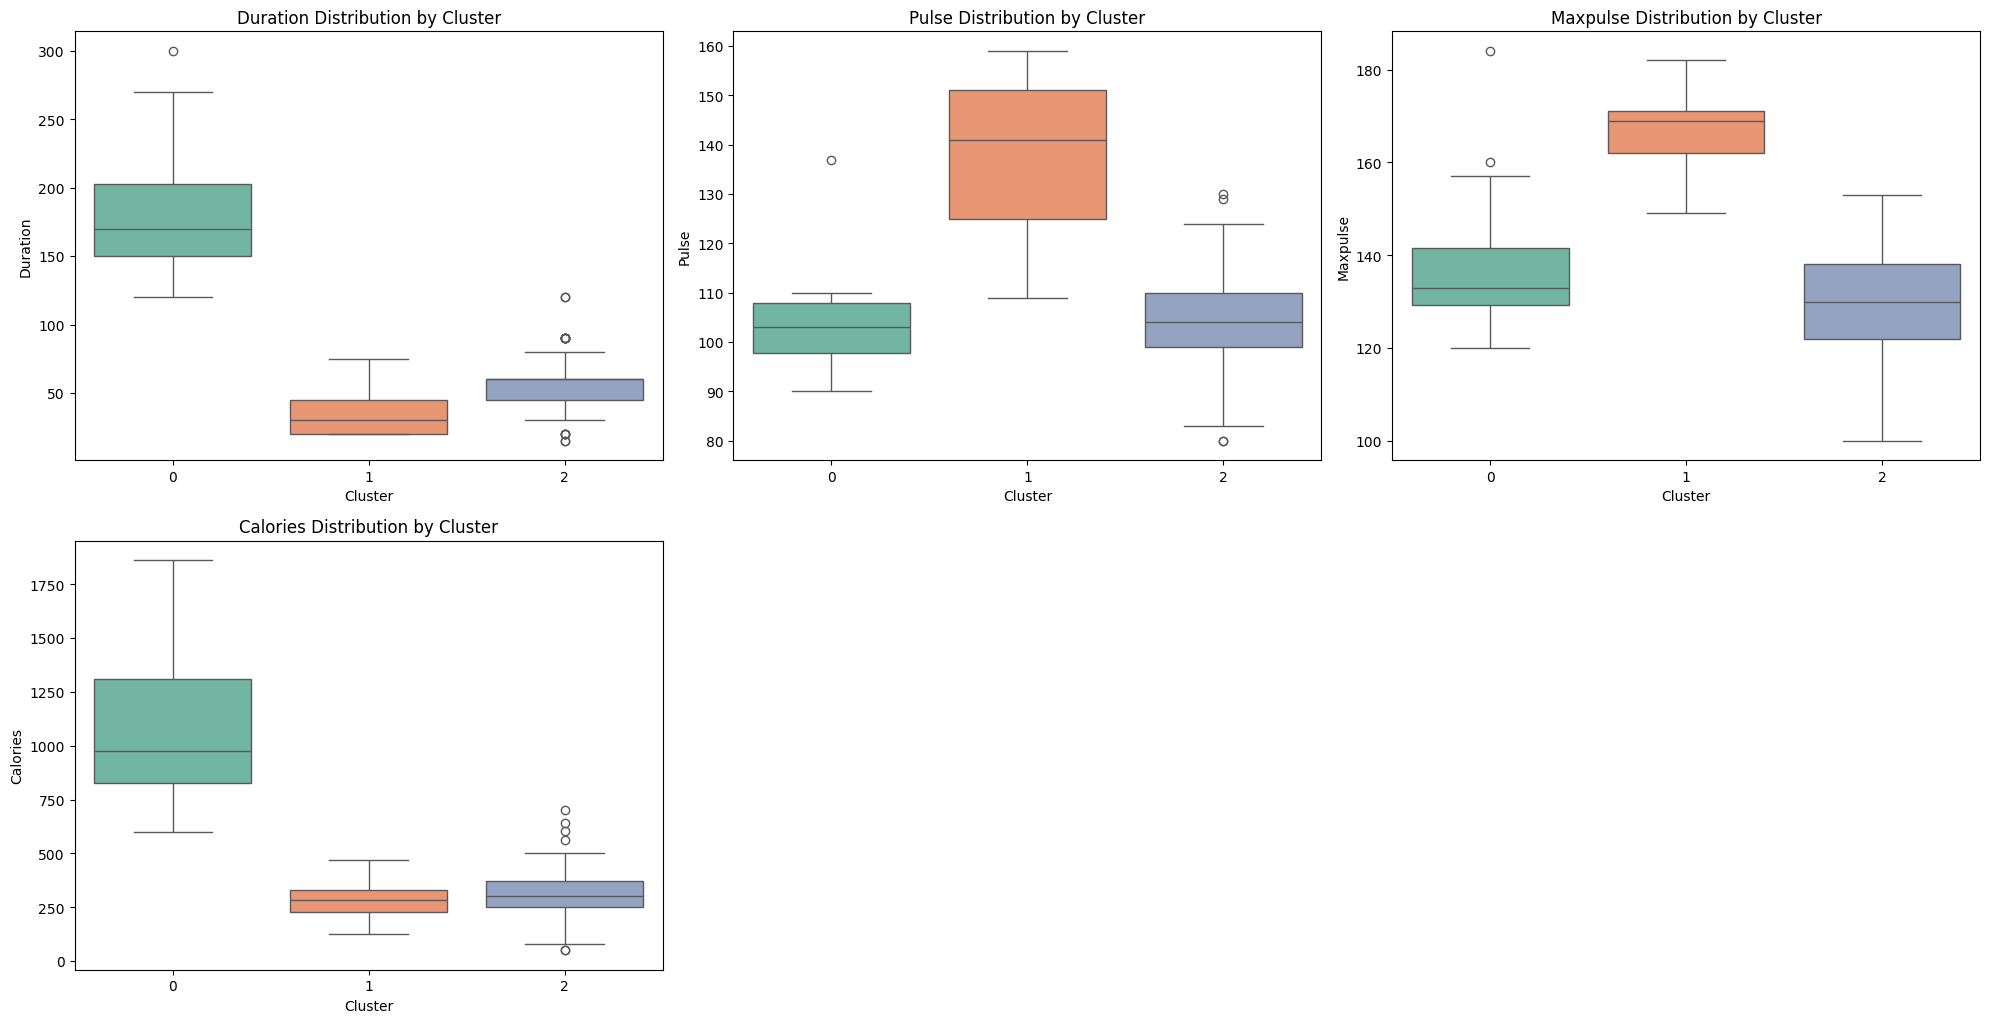

In [39]:
# Create boxplots for each feature grouped by clusters
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_for_clustering, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x="cluster", y=feature, palette="Set2")
    plt.title(f"{feature} Distribution by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()